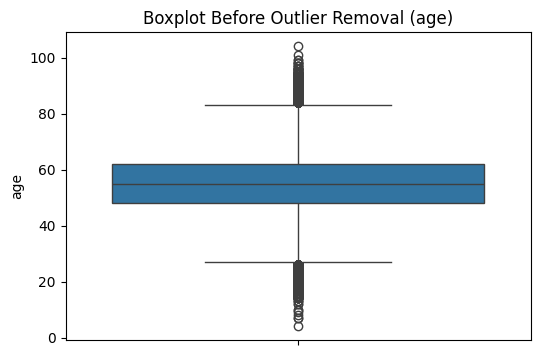

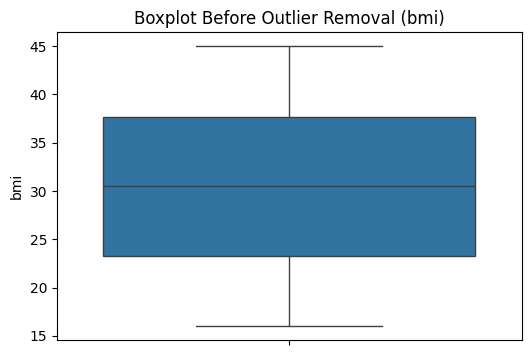

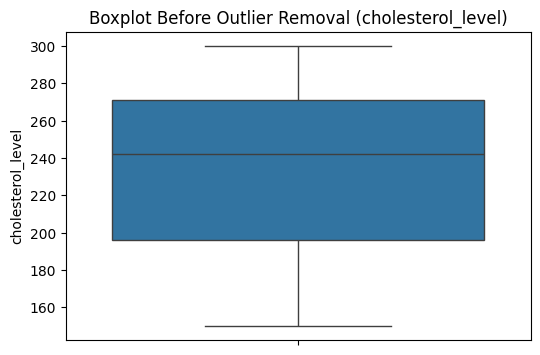

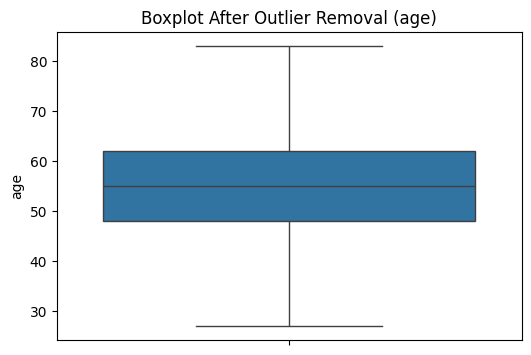

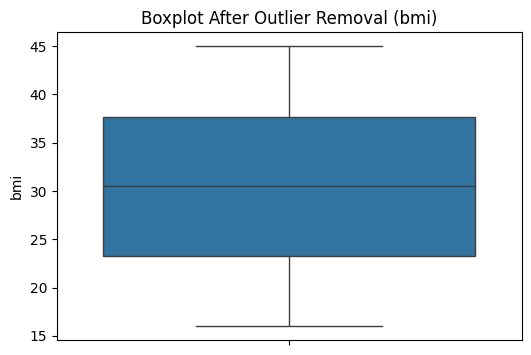

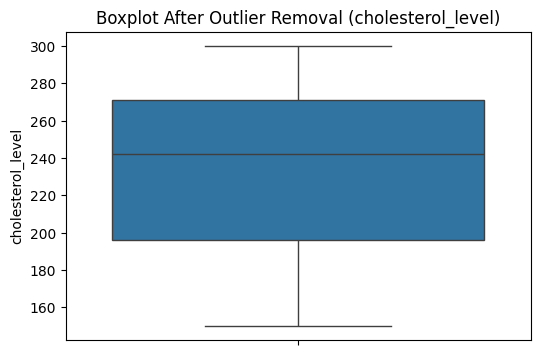

Original shape: (890000, 17)
After cleaning shape: (886105, 17)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv("C:\\Users\\NIL_07\\Downloads\\Group_ID_AIML_ASSIGMENT\\data\\raw\\Lung Cancer.csv")
# Choose numeric columns for outlier detection
numeric_cols = ["age", "bmi", "cholesterol_level"]

# -----------------------
# 1. Boxplots Before Cleaning
# -----------------------
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot Before Outlier Removal ({col})")
    plt.show()

# -----------------------
# 2. Outlier Removal using IQR
# -----------------------
df_clean = df.copy()

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keep only data within bounds
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

# -----------------------
# 3. Boxplots After Cleaning
# -----------------------
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df_clean[col])
    plt.title(f"Boxplot After Outlier Removal ({col})")
    plt.show()

print("Original shape:", df.shape)
print("After cleaning shape:", df_clean.shape)